In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [108]:
import yaml

 #leemos el archivo Yaml en Python
try:
    with open("../config.yaml", 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print('Error leyendo el archivo .yaml:', e)

In [109]:
df = pd.read_csv(config['data']['df'], sep=",", header=0, low_memory=False)

In [110]:
#Hacemos que se vean rodas las columnas
pd.set_option('display.max_columns', None)

FAVC:" Do you eat high caloric food frequently? "

FCVC:" Do you usually eat vegetables in your meals? "

NCP:" How many main meals do you have daily? "

CAEC:" Do you eat any food between meals? "

SMOKE:" Do you smoke? "

CH2O:" How much water do you drink daily? "

SCC:" Do you monitor the calories you eat daily? "

FAF:" How often do you have physical activity? "

TUE:" How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC :" How often do you drink alcohol? "

MTRANS:" Which transportation do you usually use?

In [111]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
#Miramos tanto sus dtypes como si tiene nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

### **Limpieza**

In [112]:
#Quitamos las mayusculas 
df.columns=df.columns.str.lower()

In [113]:
#Cambiamos los nombres de dos columnas "family_history_with_overweight" y "nobeyesdad"
df=df.rename(columns={"family_history_with_overweight": "family_history", "nobeyesdad": "obesity_level"})

### **EDA**

In [9]:
#calculamos la proporción de cada uno de los géneros
gender=df['gender'].value_counts(normalize=True)

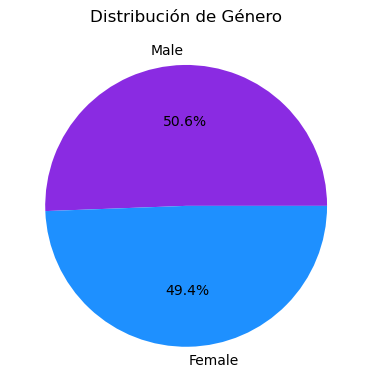

In [115]:
#creamos gráfico circular para mostrar la proporción de géneros
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1) 
custom_colors = ["#8A2BE2", "#1E90FF"]  # Colores personalizados (rojo y azul)
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Distribución de Género')
plt.show()

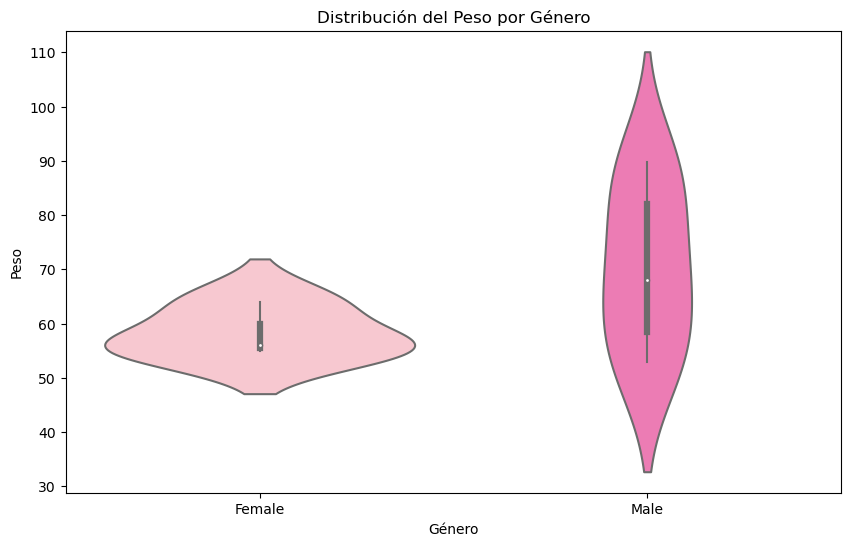

In [105]:
# Gráfico de violín para mostrar la distribución del peso por género
plt.figure(figsize=(10, 6))
custom_palette = ["#FFC0CB", "#FF69B4"]  # Esquema de color rosa
violinplot = sns.violinplot(data=df, x='gender', y='weight', palette=custom_palette)
plt.title('Distribución del Peso por Género')
plt.xlabel('Género')
plt.ylabel('Peso')
plt.show()

c:\Users\andre\anaconda3\envs\obesity_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


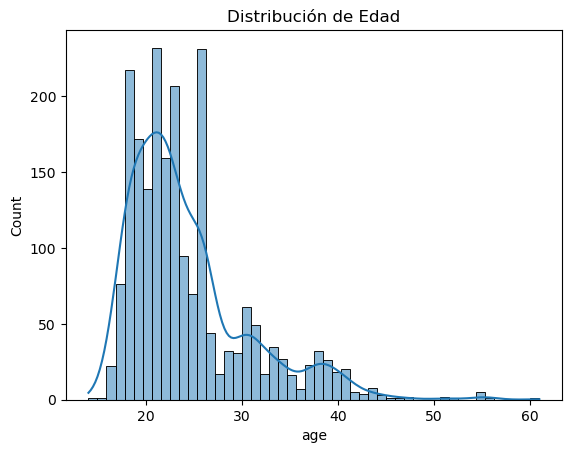

In [12]:
# Distribución de Edad
sns.histplot(data=df, x='age', kde=True)
plt.title('Distribución de Edad')
plt.show()

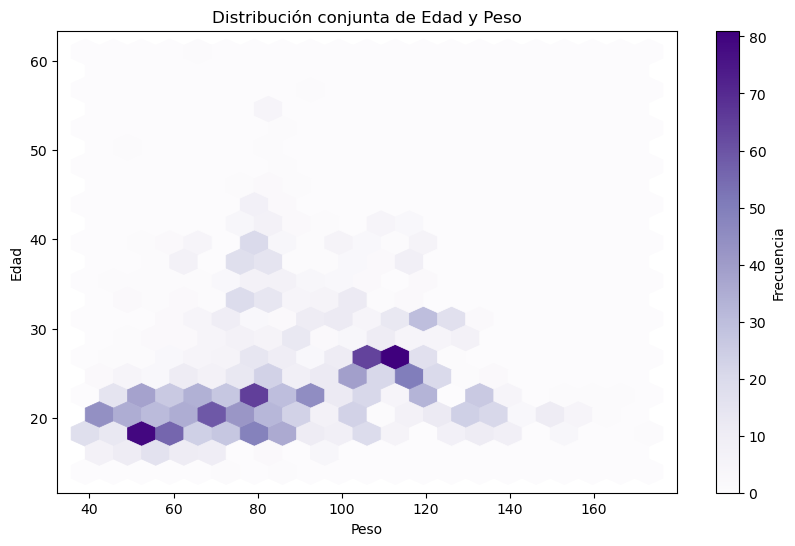

In [114]:
# Gráfico de hexbin para mostrar la distribución conjunta de la edad y el peso
plt.figure(figsize=(10, 6))
hexplot = plt.hexbin(x=df['weight'], y=df['age'], gridsize=20, cmap='Purples', linewidths=0.5)
plt.colorbar(label='Frecuencia')
plt.title('Distribución conjunta de Edad y Peso')
plt.xlabel('Peso')
plt.ylabel('Edad')
plt.show()

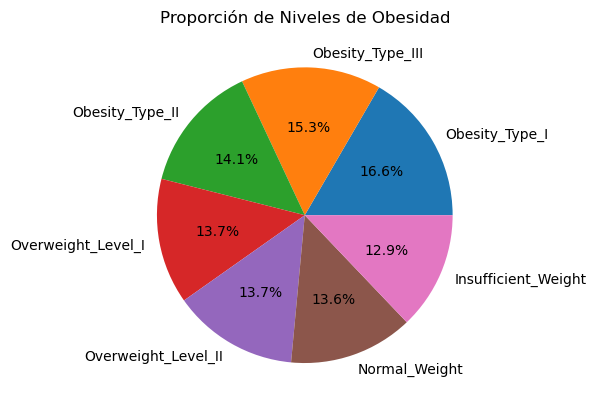

In [14]:
# Proporción de Niveles de Obesidad
df['obesity_level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporción de Niveles de Obesidad')
plt.ylabel('')
plt.show()

In [15]:
#Calculo el índice de masa corporal (IMC) por nivel de obesidad
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

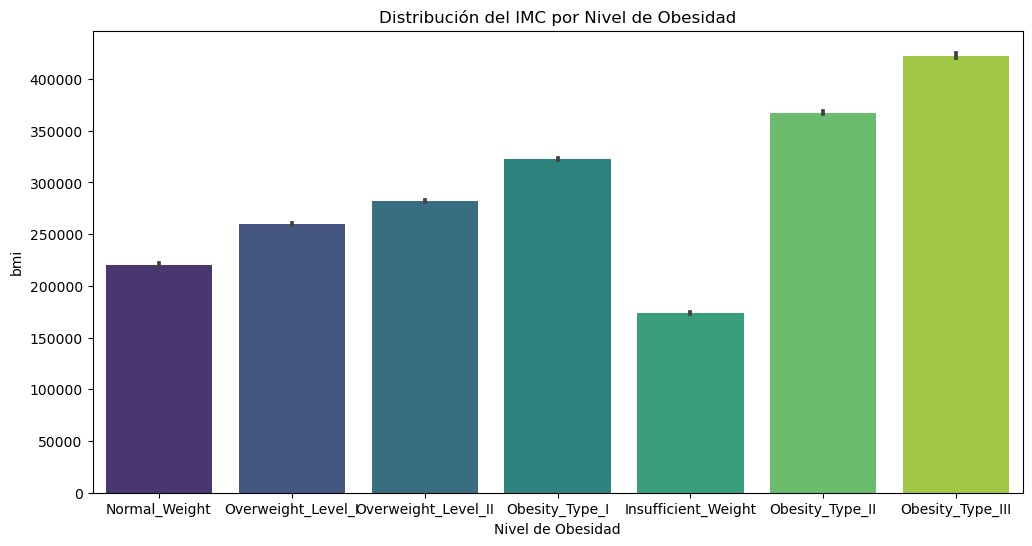

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='obesity_level', y='bmi', palette='viridis')
plt.title('Distribución del IMC por Nivel de Obesidad', fontsize=12)
plt.xlabel('Nivel de Obesidad')
plt.ylabel('bmi')
plt.show()

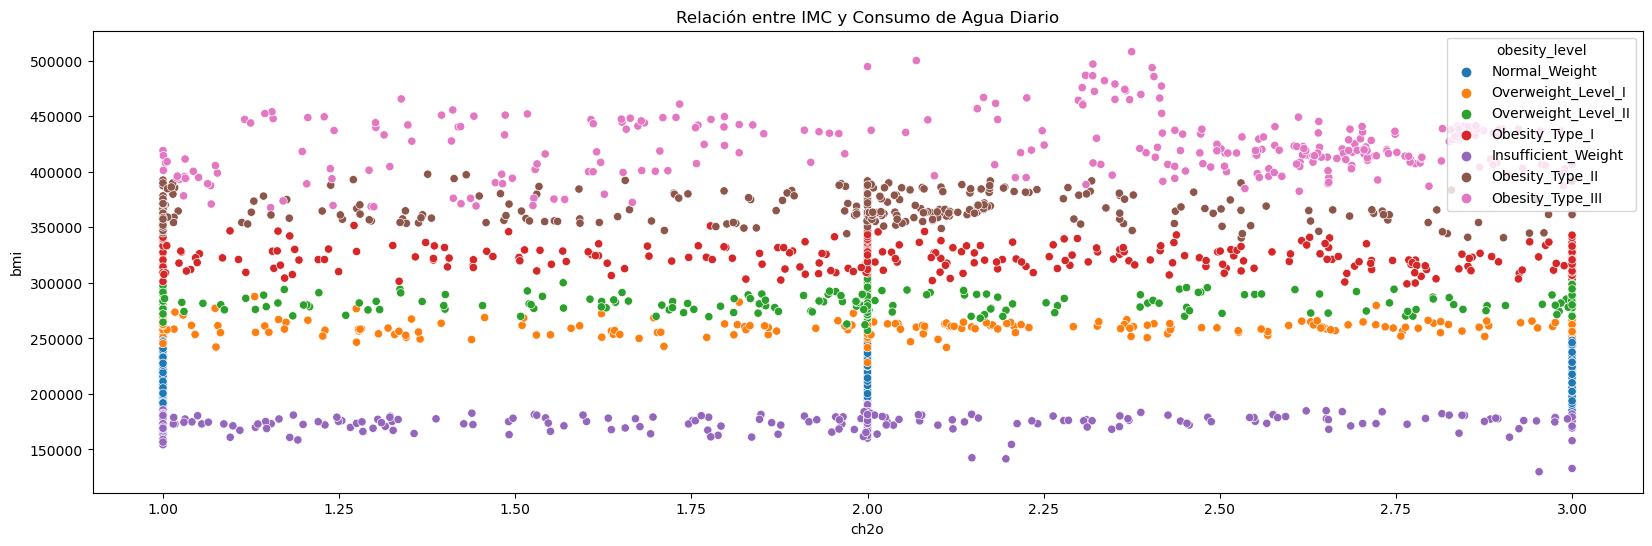

In [90]:
#Relación entre IMC y consumo de agua diaria
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='ch2o', y='bmi', hue='obesity_level')
plt.title('Relación entre IMC y Consumo de Agua Diario')
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_28720\1734100045.py:4: UserWarning:


The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.



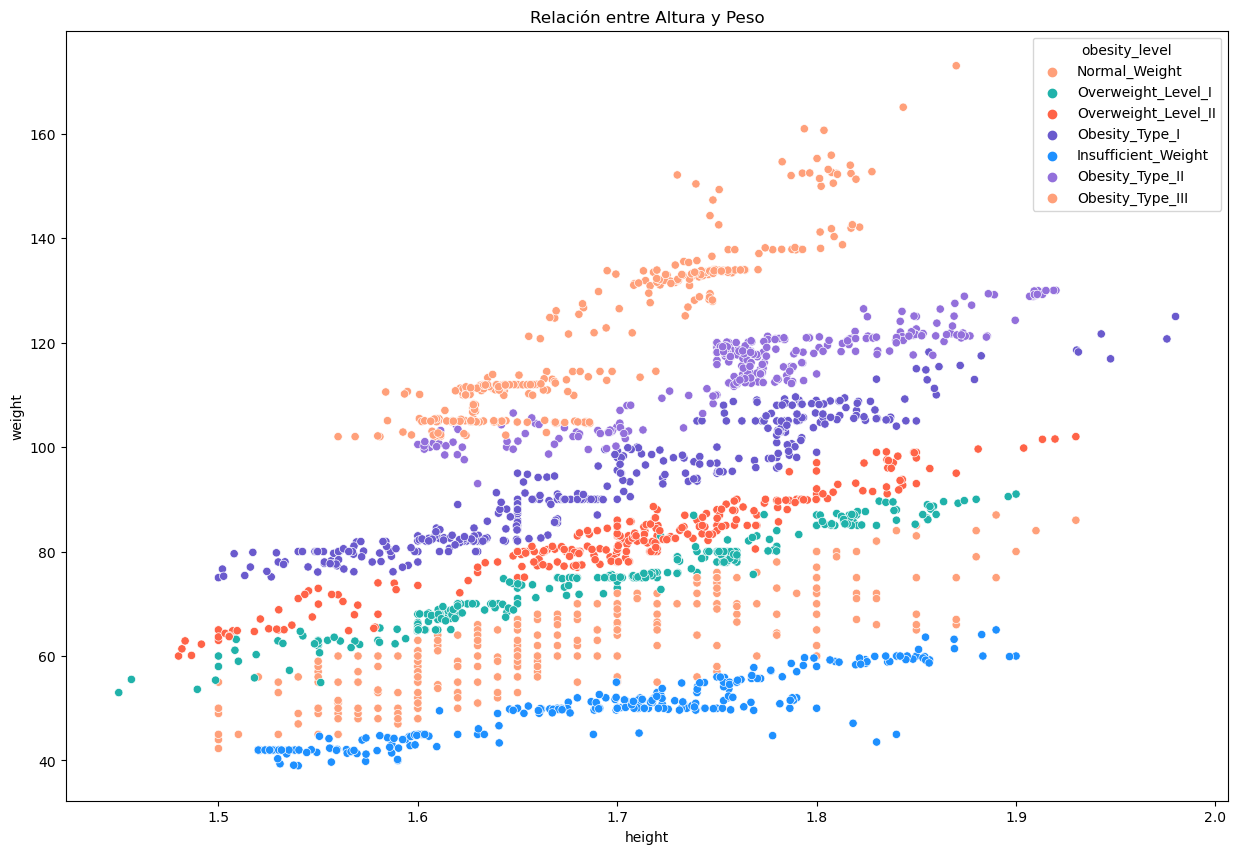

In [116]:
# Relación entre altura y peso
plt.figure(figsize=(15, 10))
custom_palette = ["#FFA07A", "#20B2AA", "#FF6347", "#6A5ACD", "#1E90FF", "#9370DB"]  # Ejemplo de colores personalizados
scatterplot = sns.scatterplot(data=df, x='height', y='weight', hue='obesity_level', palette=custom_palette)
plt.title('Relación entre Altura y Peso')
plt.show()

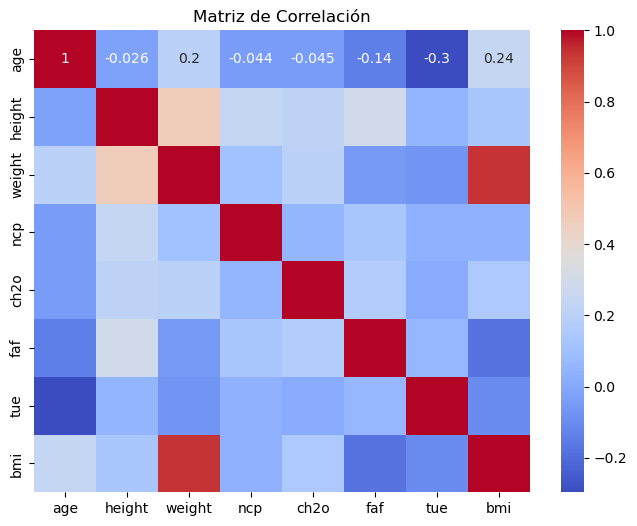

In [19]:
#Matriz de correlación entre variables númericas
plt.figure(figsize=(8, 6))
correlation_matrix = df[['age', 'height', 'weight', 'ncp', 'ch2o', 'faf', 'tue', 'bmi']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Podemos ver que hay una pequeña relación entre la edad y el peso. Así como también con el indice de masa corporal. 

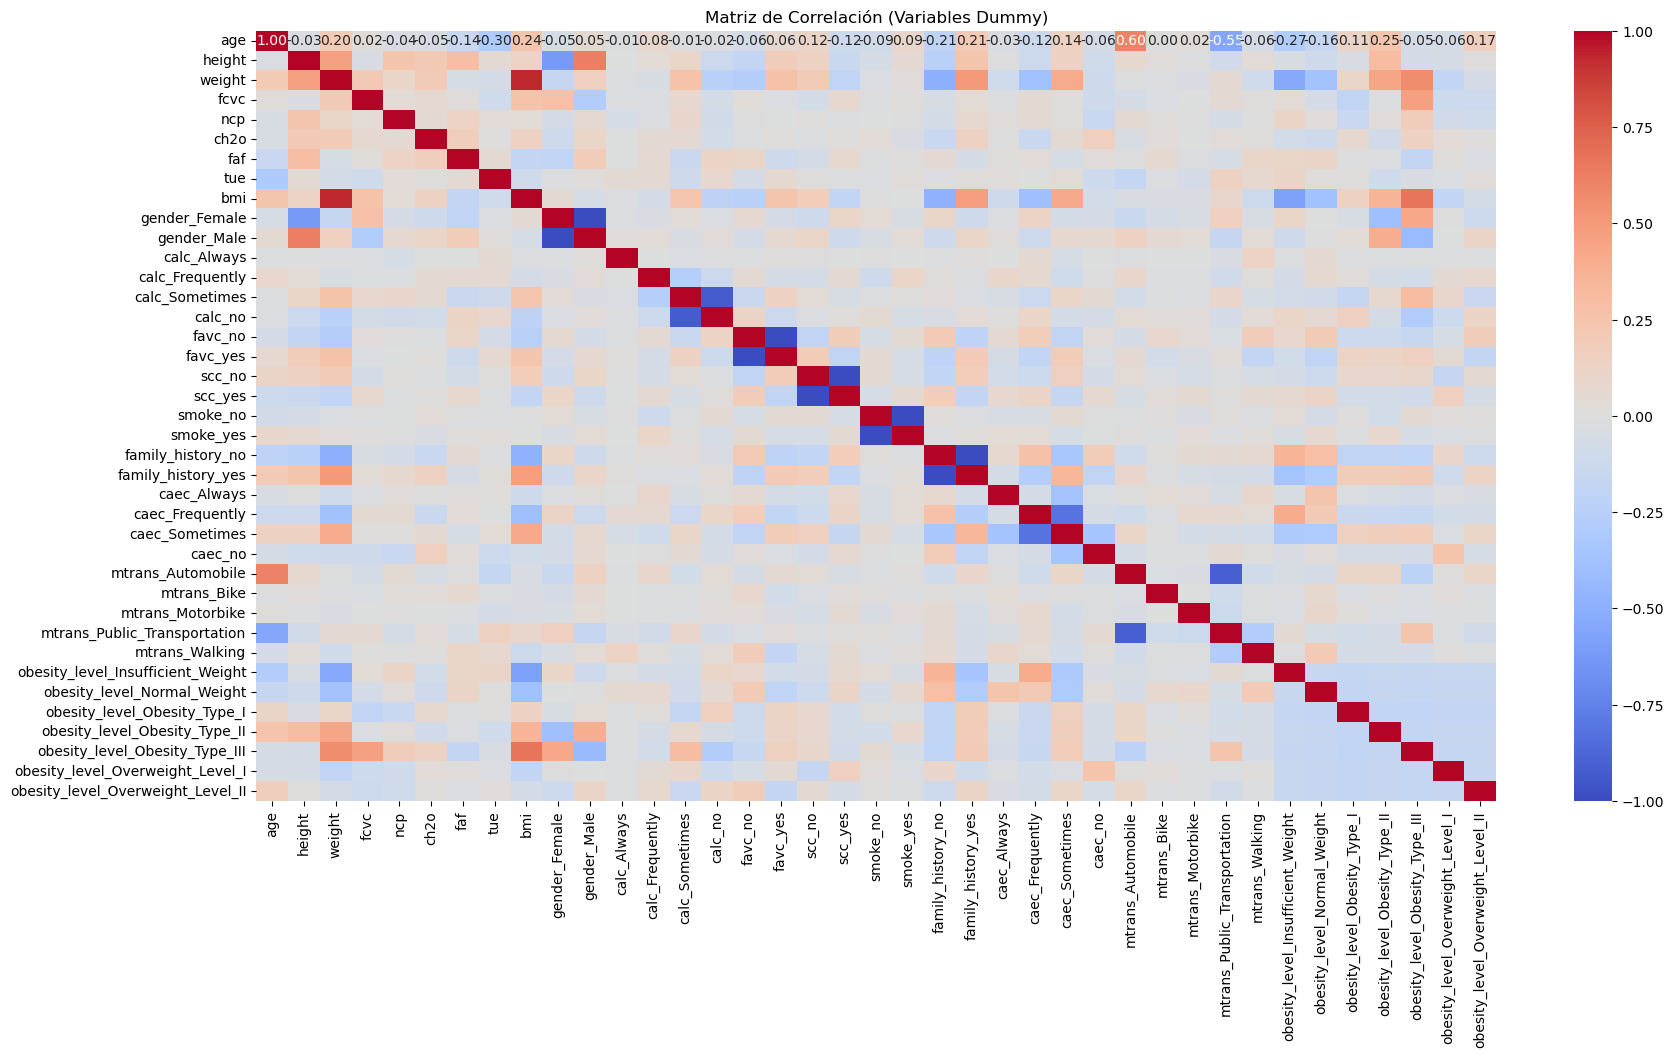

In [20]:
#calculamos la matriz de correlación para crear un mapa de calor que muestre la relación entre todas las variables

#convertimos variables categóricas en variables dummy
df_dummies = pd.get_dummies(df)

#calculamos la matriz de correlación
matriz_de_correlacion_1 = df_dummies.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(matriz_de_correlacion_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (Variables Dummy)')
plt.show()

In [21]:
#seleccionamos las columnas categoricas y numericas y las separamos en dataframes distintos.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [22]:
# Realizar One-Hot Encoding usando pd.get_dummies()
df_encoded = pd.get_dummies(df_categorical, columns=['calc', 'caec', 'mtrans'], drop_first=False)

In [23]:
# Convertir 'gender' a formato binario
df_encoded['gender'] = df_encoded['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Asegurar que las columnas binarias estén en formato correcto (0 y 1)
binary_columns = ['favc', 'scc', 'smoke', 'family_history']
for col in binary_columns:
    df_encoded[col] = df_encoded[col].apply(lambda x: 1 if x == 'yes' else 0)

In [24]:
# Unimos los dos dataframes
df_final = pd.concat([df_encoded, df_numerical], axis=1)

**Train Test Split**

In [25]:
# Eliminamos la columna 'obesity_level' de los features y lo colocamos como target
features = df_final.drop(columns = "obesity_level")
target = df_final[["obesity_level"]]

In [26]:
# Cambiamos el dtype a integer
features[features.select_dtypes(include=["bool"]).columns]=features[features.select_dtypes(include=["bool"]).columns].astype(int)

In [27]:
#Separamos la data.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state=0)

**Random Forest Classifier**

In [28]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

precision = precision_score(y_test, y_pred, average= "weighted") 
recall = recall_score(y_test, y_pred, average= "weighted") 
f1 = f1_score(y_test, y_pred, average= "weighted")
precision, recall, f1

c:\Users\andre\anaconda3\envs\obesity_project\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.9921996201969087, 0.9921135646687698, 0.9920912125942299)

In [29]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = y_train['obesity_level'].unique()
import plotly.graph_objects as go
# Creating a confusion matrix heatmap using Plotly Graph Objects with true class names
fig = go.Figure(data=go.Heatmap(
                   z=conf_matrix,
                   x=class_names,
                   y=class_names,
                   colorscale='Blues'))

# Adding annotations
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        fig.add_annotation(
            x=j, y=i,
            text=str(conf_matrix[i][j]),
            showarrow=False,
            font=dict(color="black", size=12)
        )

# Updating layout for better readability
fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    width=800, height=800
)

fig.show()

**Optimización de hiperparametros**

Randomized Search

In [30]:
grid = {
    "n_estimators": [90, 95, 100, 105, 110],
    "max_depth": [8, 9, 10, 11, 12]
}
forest = RandomForestClassifier()
model = RandomizedSearchCV(estimator=forest, param_distributions=grid, n_iter=20, cv=10, scoring='f1', random_state=42)

In [31]:
model.fit(X_train, y_train)
model.best_params_

c:\Users\andre\anaconda3\envs\obesity_project\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\andre\anaconda3\envs\obesity_project\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\envs\obesity_project\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\anaconda3\envs\obesity_project\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^

{'n_estimators': 105, 'max_depth': 9}

In [32]:
best_model = model.best_estimator_
model.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=105)

In [33]:
forest = RandomForestClassifier(n_estimators= model.best_params_["n_estimators"],
                             max_depth= model.best_params_["max_depth"])
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
precision = precision_score(y_test, y_pred, average= "weighted") 
recall = recall_score(y_test, y_pred, average= "weighted") 
f1 = f1_score(y_test, y_pred, average= "weighted")
precision, recall, f1

c:\Users\andre\anaconda3\envs\obesity_project\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.9937769072631547, 0.9936908517350158, 0.9936679451238303)

In [34]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = y_train['obesity_level'].unique()
import plotly.graph_objects as go
# Creating a confusion matrix heatmap using Plotly Graph Objects with true class names
fig = go.Figure(data=go.Heatmap(
                   z=conf_matrix,
                   x=class_names,
                   y=class_names,
                   colorscale='Blues'))

# Adding annotations
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        fig.add_annotation(
            x=j, y=i,
            text=str(conf_matrix[i][j]),
            showarrow=False,
            font=dict(color="black", size=12)
        )

# Updating layout for better readability
fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    width=800, height=800
)

fig.show()

**Entrenamiento con todos los datos**

In [35]:
# Eliminamos la columna 'obesity_level' de los features y lo colocamos como target
features = df_final.drop(columns = "obesity_level")
target = df_final[["obesity_level"]]

In [36]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(features, target)

c:\Users\andre\anaconda3\envs\obesity_project\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=10)

**Predicción**

In [37]:
features

,gender,favc,scc,smoke,family_history,calc_Always,calc_Frequently,calc_Sometimes,calc_no,caec_Always,caec_Frequently,caec_Sometimes,caec_no,mtrans_Automobile,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking,age,height,weight,fcvc,ncp,ch2o,faf,tue,bmi
0,0,0,0,0,1,False,False,False,True,False,False,True,False,False,False,False,True,False,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,243865.264441
1,0,0,1,1,1,False,False,True,False,False,False,True,False,False,False,False,True,False,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,242382.271468
2,1,0,0,0,1,False,True,False,False,False,False,True,False,False,False,False,True,False,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,237654.320988
3,1,0,0,0,0,False,True,False,False,False,False,True,False,False,False,False,False,True,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,268518.518519
4,1,0,0,0,0,False,False,True,False,False,False,True,False,False,False,False,True,False,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,283423.810125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,1,0,0,1,False,False,True,False,False,False,True,False,False,False,False,True,False,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,449014.750007
2107,0,1,0,0,1,False,False,True,False,False,False,True,False,False,False,False,True,False,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,437419.233525
2108,0,1,0,0,1,False,False,True,False,False,False,True,False,False,False,False,True,False,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,435438.165841
2109,0,1,0,0,1,False,False,True,False,False,False,True,False,False,False,False,True,False,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,440715.354033


In [38]:
df_categorical

,gender,calc,favc,scc,smoke,family_history,caec,mtrans,obesity_level
0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
1,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
3,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I
4,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III


In [39]:
# Creamos un nuevo dataframe para datos artificiales categoricos
df_cat_to_predict = pd.DataFrame(columns= df_categorical.columns)

# Eliminamos la columna 'obesity_level' ya que es la que queremos predecir
df_cat_to_predict.drop(columns=['obesity_level'], inplace=True)

# Generamos datos aleatorios
gender_options = df_categorical['gender'].unique()
temp_gender = np.random.choice(gender_options)
df_cat_to_predict.loc[1, "gender"] = temp_gender

calc_options= df_categorical['calc'].unique()
temp_calc=np.random.choice(calc_options)
df_cat_to_predict.loc[1, "calc"] = temp_calc

favc_options= df_categorical['favc'].unique()
temp_favc=np.random.choice(favc_options)
df_cat_to_predict.loc[1, "favc"] = temp_favc

scc_options= df_categorical['scc'].unique()
temp_scc=np.random.choice(scc_options)
df_cat_to_predict.loc[1, "scc"] = temp_scc

smoke_options= df_categorical['smoke'].unique()
temp_smoke=np.random.choice(smoke_options)
df_cat_to_predict.loc[1, "smoke"] = temp_smoke

family_history_options= df_categorical['family_history'].unique()
temp_family_history=np.random.choice(family_history_options)
df_cat_to_predict.loc[1, "family_history"] = temp_family_history

caec_options= df_categorical['caec'].unique()
temp_caec=np.random.choice(caec_options)
df_cat_to_predict.loc[1, "caec"] = temp_caec

mtrans_options= df_categorical['mtrans'].unique()
temp_mtrans=np.random.choice(mtrans_options)
df_cat_to_predict.loc[1, "mtrans"] = temp_mtrans

In [40]:
# Convertir 'gender' a formato binario
df_cat_to_predict['gender'] = df_cat_to_predict['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Asegurar que las columnas binarias estén en formato correcto (0 y 1)
binary_columns = ['favc', 'scc', 'smoke', 'family_history']
for col in binary_columns:
    df_cat_to_predict[col] = df_cat_to_predict[col].apply(lambda x: 1 if x == 'yes' else 0)

In [41]:
#Creamos las columnas faltantes
new_columns = ['calc_Always','calc_Frequently',
       'calc_Sometimes', 'calc_no','caec_Always','caec_Frequently', 'caec_Sometimes',
       'caec_no','mtrans_Automobile','mtrans_Bike', 'mtrans_Motorbike',
       'mtrans_Public_Transportation', 'mtrans_Walking']

# Añadimos las nuevas columnas
for col in new_columns:
    df_cat_to_predict[col] = np.nan

In [42]:
# Rellenamos las filas de las columnas nuevas con los datos aleatorios que se generen
df_cat_to_predict.loc[1, "calc_" + df_cat_to_predict['calc'][1]] = 1 

In [43]:
df_cat_to_predict.loc[1, "caec_" + df_cat_to_predict['caec'][1]] = 1 

In [44]:
df_cat_to_predict.loc[1, "mtrans_" + df_cat_to_predict['mtrans'][1]] = 1 

In [45]:
# Eliminamos las columnas sobrantes 
df_cat_to_predict.drop(columns=['calc', 'caec', 'mtrans'], inplace=True)

In [46]:
# Rellenamos los Na con 0
df_cat_to_predict.fillna(0, inplace=True)

In [47]:
df_cat_to_predict

,gender,favc,scc,smoke,family_history,calc_Always,calc_Frequently,calc_Sometimes,calc_no,caec_Always,caec_Frequently,caec_Sometimes,caec_no,mtrans_Automobile,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking
1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
df_numerical

,age,height,weight,fcvc,ncp,ch2o,faf,tue,bmi
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,243865.264441
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,242382.271468
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,237654.320988
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,268518.518519
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,283423.810125
...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,449014.750007
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,437419.233525
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,435438.165841
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,440715.354033


In [49]:
# # Creamos un nuevo dataframe para datos artificiales numericos
df_num_predict = pd.DataFrame(columns= df_numerical.columns)

# Generamos datos aleatorios
age_options= df_numerical['age'].unique()
temp_age=np.random.choice(age_options)
df_num_predict.loc[1, "age"] = temp_age

height_options= df_numerical['height'].unique()
temp_height=np.random.choice(height_options)
df_num_predict.loc[1, "height"] = temp_height

weight_options= df_numerical['weight'].unique()
temp_weight=np.random.choice(weight_options)
df_num_predict.loc[1, "weight"] = temp_weight

fcvc_options= df_numerical['fcvc'].unique()
temp_fcvc=np.random.choice(fcvc_options)
df_num_predict.loc[1, "fcvc"] = temp_fcvc

ncp_options= df_numerical['ncp'].unique()
temp_ncp=np.random.choice(ncp_options)
df_num_predict.loc[1, "ncp"] = temp_ncp

ch2o_options= df_numerical['ch2o'].unique()
temp_ch2o=np.random.choice(ch2o_options)
df_num_predict.loc[1, "ch2o"] = temp_ch2o

faf_options= df_numerical['faf'].unique()
temp_faf=np.random.choice(faf_options)
df_num_predict.loc[1, "faf"] = temp_faf

tue_options= df_numerical['tue'].unique()
temp_tue=np.random.choice(tue_options)
df_num_predict.loc[1, "tue"] = temp_tue

bmi_options= df_numerical['bmi'].unique()
temp_bmi=np.random.choice(bmi_options)
df_num_predict.loc[1, "bmi"] = temp_bmi


In [50]:
df_num_predict

,age,height,weight,fcvc,ncp,ch2o,faf,tue,bmi
1,26.684354,1.717775,68.392133,1.977298,3.697831,2.140544,1.979355,0.688058,405751.993886


In [51]:
# Unimos los dos dataframes
df_predict = pd.concat([df_cat_to_predict, df_num_predict], axis=1)

In [52]:
# Cambiamos el dtype a integer
df_predict[df_predict.select_dtypes(include=["bool"]).columns]=df_predict[df_predict.select_dtypes(include=["bool"]).columns].astype(int)

In [53]:
df_predict

,gender,favc,scc,smoke,family_history,calc_Always,calc_Frequently,calc_Sometimes,calc_no,caec_Always,caec_Frequently,caec_Sometimes,caec_no,mtrans_Automobile,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking,age,height,weight,fcvc,ncp,ch2o,faf,tue,bmi
1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26.684354,1.717775,68.392133,1.977298,3.697831,2.140544,1.979355,0.688058,405751.993886


In [55]:
# Generamos la predicción
rf.predict(df_predict)[0]

'Obesity_Type_I'